In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import scipy

## Импорт данных

In [58]:
students = pd.read_csv('stud_math.csv')
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [59]:
display(students.head(10))
display(students.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

## Предобработка

In [60]:
students.columns = ['school', 'sex', 'age', 'address', 'family_size', 'resid_status', 'mom_edu', 'dad_edu',
                    'mom_job', 'dad_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures',
                    'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher',
                    'internet', 'romantic', 'fam_relation', 'free_time', 'go_out', 'health', 'absence', 'score']

# конвертиртация str в числовые показатели


def convert_yes_no(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0
    else:
        return x


def convert_let2num(x):
    if x == 'GP' or x == 'F' or x == 'U' or x == 'GT3' or x == 'T':
        return 1
    elif x == 'MS' or x == 'M' or x == 'R' or x == 'LE3' or x == 'A':
        return 2
    else:
        return x


def convert_job(x):
    if x == 'teacher':
        return 1
    elif x == 'health':
        return 2
    elif x == 'services':
        return 3
    elif x == 'at_home':
        return 4
    elif x == 'other':
        return 5
    else:
        return x


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_pairplot(column):
    sns.pairplot(students, x_vars=column, y_vars='score', kind='reg')
    plt.show()

### Место обучения ('1' - GP, '2' - MS)

In [61]:
display(pd.DataFrame(students.school.value_counts()))

students_GP = students[students.school == 'GP']
students_MS = students[students.school == 'MS']
GP_score = round(((students_GP.score >= students.score.mean()
                   ).sum()/students_GP.school.count())*100, 2)
MS_score = round(((students_MS.score >= students.score.mean()
                   ).sum()/students_MS.school.count())*100, 2)
print('Процент учеников, набравших баллов выше среднего по школе GP:', GP_score, '% \n',
      'Процент учеников, набравших баллов выше среднего по школе MS:', MS_score, '%')

display(students_GP.score.describe())
display(students_MS.score.describe())

,school
GP,349
MS,46


Процент учеников, набравших баллов выше среднего по школе GP: 54.15 % 
 Процент учеников, набравших баллов выше среднего по школе MS: 41.3 %


count    344.000000
mean      52.630814
std       23.116772
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

count    45.000000
mean     49.444444
std      21.379212
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

In [62]:
students.school = students.school.apply(convert_let2num)

school   -0.044524
dtype: float64

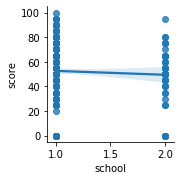

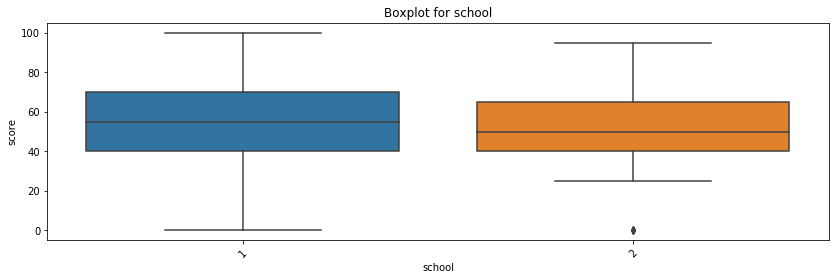

In [63]:
display(pd.DataFrame(students.school).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['school'])
for col in ['school']:
    get_boxplot(col)

### Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [64]:
students_course = students[students.reason == 'course']
students_rep = students[students.reason == 'reputation']
students_home = students[students.reason == 'home']
students_home[students.school == 2].describe()

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,school,age,mom_edu,dad_edu,travel_time,study_time,failures,"studytime, granular",fam_relation,free_time,go_out,health,absence,score
count,10.0,10.000000,10.000000,10.000000,8.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
mean,2.0,18.100000,2.400000,2.000000,2.250000,1.900000,0.70000,-5.700000,3.800000,3.200000,3.200000,2.800000,5.200000,51.666667
std,0.0,0.737865,1.349897,1.054093,1.035098,0.737865,1.05935,2.213594,0.788811,1.229273,1.032796,1.135292,3.910101,15.000000
min,2.0,17.000000,1.000000,1.000000,1.000000,1.000000,0.00000,-9.000000,3.000000,1.000000,2.000000,1.000000,0.000000,25.000000
25%,2.0,18.000000,1.000000,1.000000,1.750000,1.250000,0.00000,-6.000000,3.000000,2.250000,2.250000,2.000000,4.000000,45.000000
50%,2.0,18.000000,2.500000,2.000000,2.000000,2.000000,0.00000,-6.000000,4.000000,3.500000,3.000000,3.000000,4.000000,50.000000
75%,2.0,18.750000,3.750000,2.750000,3.000000,2.000000,1.00000,-3.750000,4.000000,4.000000,4.000000,3.000000,7.000000,55.000000
max,2.0,19.000000,4.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,5.000000,5.000000,5.000000,5.000000,14.000000,75.000000


Среднее по ЕГЭ у 119 учеников, которые выбрали школу GP из-за программы = 49.8 и у 18 учеников из школы MS = 49.7. Показатели среднего практически не меняются при изменении причины выбора школы.  

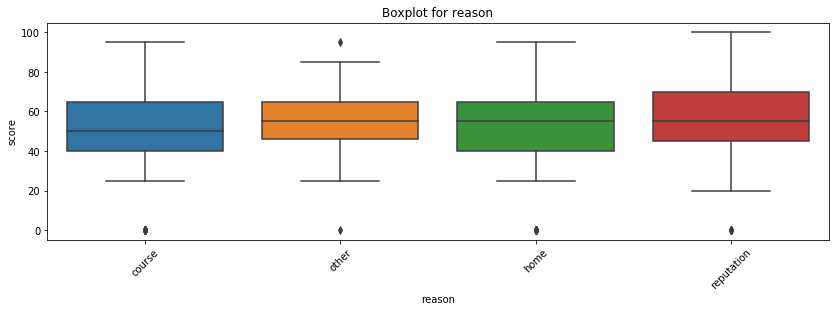

In [66]:
students.reason = students.reason.apply(
    lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
for col in ['reason']:
    get_boxplot(col)

### Пол ученика ('1' - F, '2' - M)

,sex
1,208
2,187


Series([], dtype: float64)

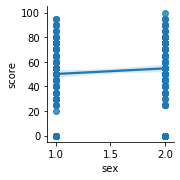

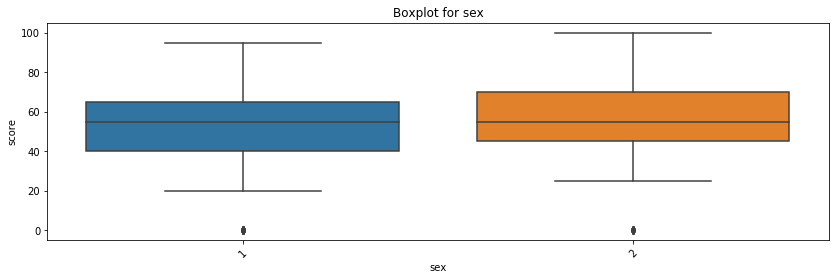

,school,sex,age,mom_edu,dad_edu,travel_time,study_time,failures,"studytime, granular",fam_relation,free_time,go_out,health,absence,score
count,208.000000,208.0,208.000000,207.000000,197.000000,192.000000,204.000000,200.00000,204.000000,196.000000,200.000000,203.000000,202.000000,204.000000,204.000000
mean,1.120192,1.0,16.730769,2.666667,2.670051,1.406250,2.284314,0.31000,-6.852941,3.892857,3.010000,3.014778,3.351485,8.112745,50.098039
std,0.325971,0.0,1.201696,1.088332,2.883409,0.648448,0.792545,0.71164,2.377634,0.952056,0.940384,1.087635,1.407239,28.167725,23.070682
min,1.000000,1.0,15.000000,0.000000,1.000000,1.000000,1.000000,0.00000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.0,16.000000,2.000000,2.000000,1.000000,2.000000,0.00000,-9.000000,4.000000,2.000000,2.000000,2.000000,0.000000,40.000000
50%,1.000000,1.0,17.000000,3.000000,2.000000,1.000000,2.000000,0.00000,-6.000000,4.000000,3.000000,3.000000,3.000000,4.000000,55.000000
75%,1.000000,1.0,18.000000,4.000000,3.000000,2.000000,3.000000,0.00000,-6.000000,4.000000,4.000000,4.000000,5.000000,8.000000,65.000000
max,2.000000,1.0,20.000000,4.000000,40.000000,4.000000,4.000000,3.00000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,95.000000


In [67]:
students.sex = students.sex.apply(convert_let2num)
display(pd.DataFrame(students.sex.value_counts()))


display(pd.DataFrame(students.reason).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['sex'])
for col in ['sex']:
    get_boxplot(col)
students[students.sex == 1].describe()

### Статус совместного жилья родителей ('1' - живут вместе, '2' - раздельно)

In [68]:
students.resid_status = students.resid_status.apply(
    convert_let2num).apply(lambda x: None if pd.isnull(x) else x)
pd.DataFrame(students.resid_status.value_counts())

,resid_status
1.0,314
2.0,36


resid_status    0.045985
dtype: float64

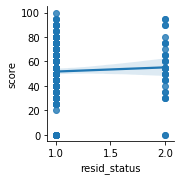

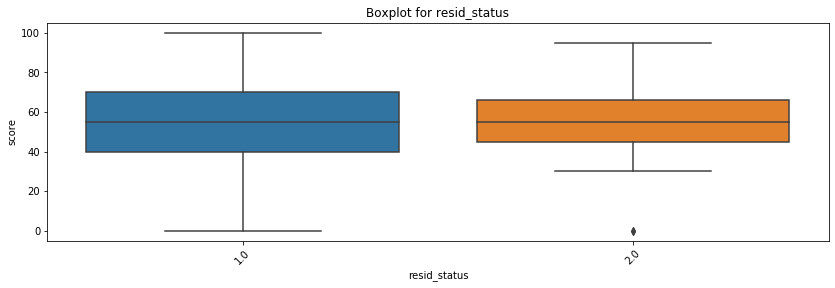

,school,sex,age,resid_status,mom_edu,dad_edu,travel_time,study_time,failures,"studytime, granular",fam_relation,free_time,go_out,health,absence,score
count,36.000000,36.000000,36.000000,36.0,36.000000,32.000000,32.000000,36.000000,34.000000,36.000000,32.000000,35.000000,34.000000,35.000000,36.000000,36.000000
mean,1.055556,1.416667,16.638889,2.0,3.194444,2.875000,1.250000,2.027778,0.323529,-6.083333,3.906250,3.085714,2.970588,3.514286,15.000000,55.138889
std,0.232311,0.500000,1.457057,0.0,0.821825,1.099853,0.508001,0.736250,0.726994,2.208749,1.088336,1.121224,1.114241,1.462702,36.318433,22.312268
min,1.000000,1.000000,15.000000,2.0,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,15.000000,2.0,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,3.000000,2.500000,2.000000,3.000000,0.000000,45.000000
50%,1.000000,1.000000,16.500000,2.0,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,6.000000,55.000000
75%,1.000000,2.000000,17.250000,2.0,4.000000,4.000000,1.000000,2.000000,0.000000,-6.000000,5.000000,4.000000,4.000000,5.000000,12.000000,66.250000
max,2.000000,2.000000,20.000000,2.0,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,212.000000,95.000000


In [69]:
display(pd.DataFrame(students.resid_status).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['resid_status'])
for col in ['resid_status']:
    get_boxplot(col)
students[students.resid_status == 2].describe()

##### Графики показывают, что статус совместного жилья с родителями не вливает на средние показатели успеваемости. Проверим влияние образования и работы опекунаю

### Опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [70]:
divorced_parents = students[students.resid_status == 2]
divorced_parents_mom = divorced_parents[divorced_parents.guardian == 'mother']
divorced_parents_mom[divorced_parents_mom.score >= students.score.mean()]

,school,sex,age,address,family_size,resid_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,fam_relation,free_time,go_out,health,absence,score
8,1,2,15,U,LE3,2.0,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
37,1,2,16,R,GT3,2.0,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,1,1,16,U,LE3,2.0,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
56,1,1,15,U,GT3,2.0,4.0,3.0,services,services,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,1.0,0.0,75.0
66,1,2,15,U,GT3,2.0,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
104,1,2,15,U,GT3,2.0,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
110,1,2,15,U,LE3,2.0,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
126,1,1,15,U,LE3,2.0,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,-6.0,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
212,1,1,16,U,GT3,2.0,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,NaN,NaN,-6.0,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
229,1,1,17,U,GT3,2.0,2.0,1.0,other,NaN,course,mother,2.0,3.0,0.0,no,no,no,yes,yes,-9.0,yes,yes,yes,NaN,2.0,3.0,3.0,10.0,60.0


/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


guardian   -0.024598
dtype: float64

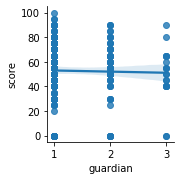

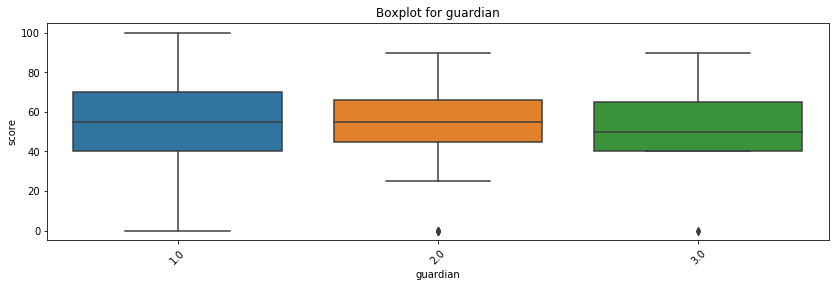

In [116]:
students.guardian = students.guardian.apply(lambda x: 1 if x == 'mother' else 2 if x ==
                                            'father' else 3 if x == 'other' else x).apply(lambda x: None if pd.isnull(x) else x)

display(pd.DataFrame(students.guardian).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['guardian'])
for col in ['guardian']:
    get_boxplot(col)

### Образование матери ('0' - нет, '1' - 4 класса, '2' - 5-9 классы, '3' - среднее специальное или 11 классов, '4' - высшее)

mom_edu    0.213349
dtype: float64

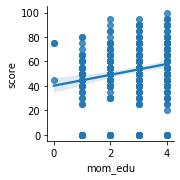

In [72]:
students.mom_edu = students.mom_edu.apply(
    lambda x: None if pd.isnull(x) else x)
pd.DataFrame(students.mom_edu.value_counts())

display(pd.DataFrame(students.mom_edu).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['mom_edu'])

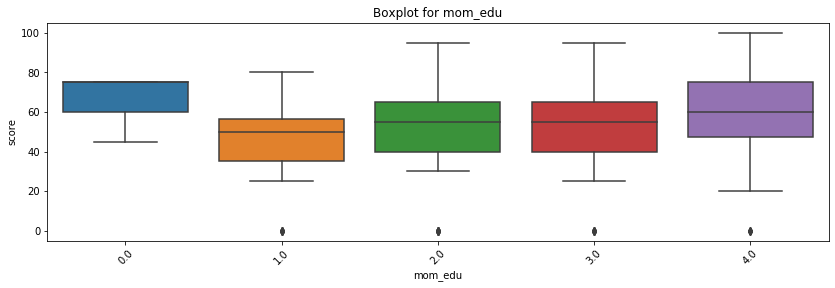

In [69]:
for col in ['mom_edu']:
    get_boxplot(col)

### Образование отца ('0' - нет, '1' - 4 класса, '2' - 5-9 классы, '3' - среднее специальное или 11 классов, '4' - высшее)

In [73]:
# очищаем данные от верхних выбросов
students = students.loc[students.dad_edu <= 4]

students.dad_edu = students.dad_edu.apply(
    lambda x: None if pd.isnull(x) else x)
students.dad_edu.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: dad_edu, dtype: int64

dad_edu    0.130002
dtype: float64

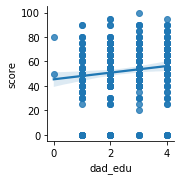

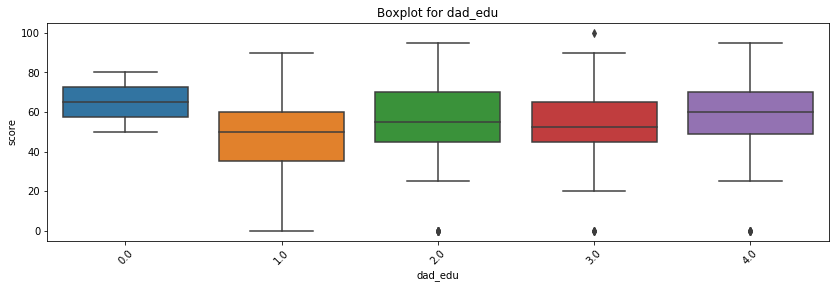

In [74]:
display(pd.DataFrame(students.dad_edu).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['dad_edu'])
for col in ['dad_edu']:
    get_boxplot(col)

### Возраст ученика 15 - 22

In [114]:
pd.DataFrame(students.age.value_counts())
students[students.age >= 20]

,school,sex,age,address,family_size,resid_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,fam_relation,free_time,go_out,health,absence,score,absence_exclud
247,1,2,22,1.0,1.0,1.0,3.0,1.0,3.0,3.0,other,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,1.0,1.0,5.0,4.0,5.0,1.0,16.0,40.0,16.0
306,1,2,20,1.0,1.0,2.0,3.0,2.0,3.0,5.0,course,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-3.0,1.0,0.0,0.0,5.0,5.0,3.0,5.0,0.0,90.0,0.0
376,2,1,20,NaN,1.0,1.0,4.0,2.0,2.0,5.0,course,NaN,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,-9.0,1.0,1.0,1.0,5.0,4.0,3.0,3.0,4.0,75.0,4.0
390,2,2,20,1.0,2.0,2.0,2.0,2.0,3.0,3.0,course,NaN,1.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,0.0,0.0,5.0,5.0,4.0,4.0,212.0,45.0,NaN
392,2,2,21,2.0,1.0,1.0,1.0,1.0,5.0,5.0,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,-3.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0,3.0


age   -0.148832
dtype: float64

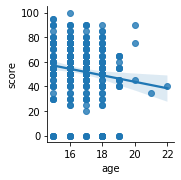

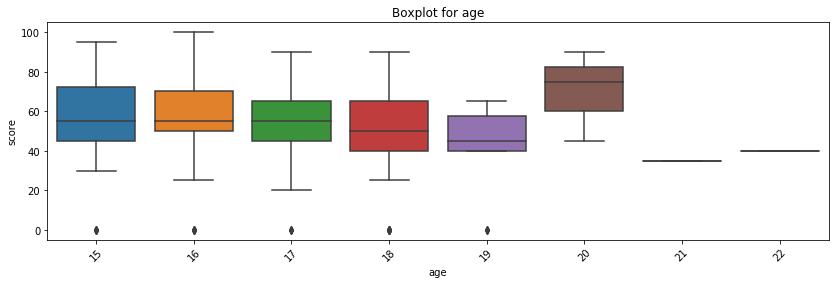

In [115]:
display(pd.DataFrame(students.age).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['age'])
for col in ['age']:
    get_boxplot(col)

### Tип адреса ученика ( '1' - городской, '2' - за городом)

In [79]:
students.address = students.address.apply(
    convert_let2num).apply(lambda x: None if pd.isnull(x) else x)

pd.DataFrame(students.address.value_counts())
students.address.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1.0    274
2.0     80
Name: address, dtype: int64

address   -0.1399
dtype: float64

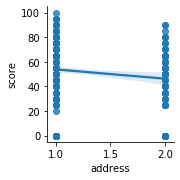

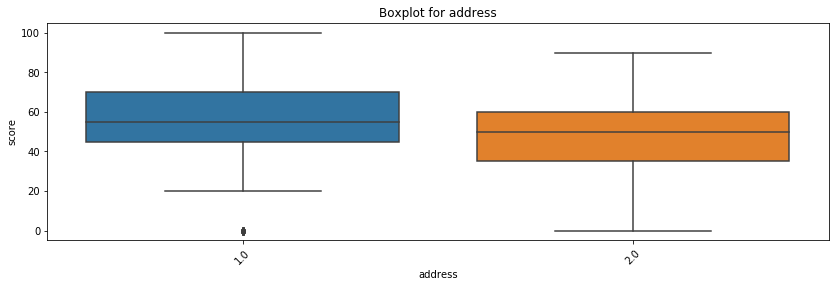

In [80]:
display(pd.DataFrame(students.address).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['address'])
for col in ['address']:
    get_boxplot(col)

### Размер семьи('1' - GT3 >3, '2' - LE3 <= 3 )

In [82]:
students.family_size = students.family_size.apply(
    lambda x: None if pd.isnull(x) else x).apply(convert_let2num)

family_size    0.089121
dtype: float64

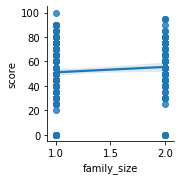

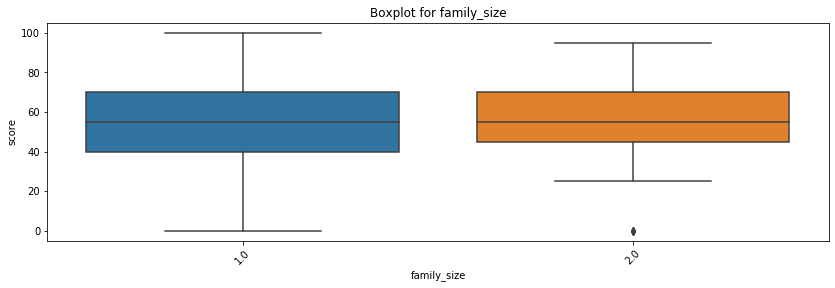

In [85]:
display(pd.DataFrame(students.family_size).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['family_size'])
for col in ['family_size']:
    get_boxplot(col)

### Работа матери ('1' - учитель, '2' - сфера здравоохранения, '3' - гос служба, '4' - не работает, '5' - другое)

In [83]:
students.mom_job = students.mom_job.apply(
    convert_job).apply(lambda x: None if pd.isnull(x) else x)
students.mom_job.value_counts()

5.0    125
3.0     90
4.0     57
1.0     48
2.0     31
Name: mom_job, dtype: int64

mom_job   -0.148021
dtype: float64

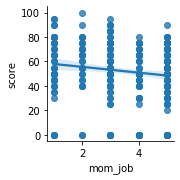

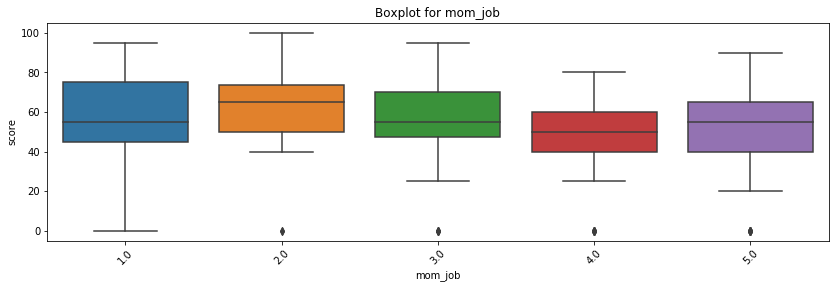

In [88]:
display(pd.DataFrame(students.mom_job).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['mom_job'])
for col in ['mom_job']:
    get_boxplot(col)

### Работа отца ('1' - учитель, '2' - сфера здравоохранения, '3' - гос служба, '4 - не работает, '5' - другое)

In [84]:
students.dad_job = students.dad_job.apply(
    convert_job).apply(lambda x: None if pd.isnull(x) else x)
students.dad_job.value_counts()

5.0    189
3.0     94
1.0     26
4.0     14
2.0     13
Name: dad_job, dtype: int64

dad_job   -0.058366
dtype: float64

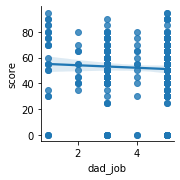

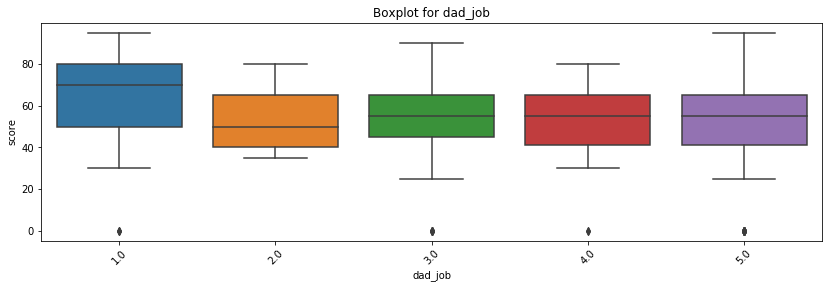

In [85]:
display(pd.DataFrame(students.dad_job).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['dad_job'])
for col in ['dad_job']:
    get_boxplot(col)

### Время в пути до школы ('1' - <15 мин., '2' - 15-30 мин., '3' - 30-60 мин., '4' - >60 мин.)

In [86]:
students.travel_time = students.travel_time.apply(
    lambda x: None if pd.isnull(x) else x)
students.travel_time.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1.0    225
2.0     92
3.0     21
4.0      7
Name: travel_time, dtype: int64

travel_time   -0.073556
dtype: float64

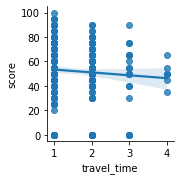

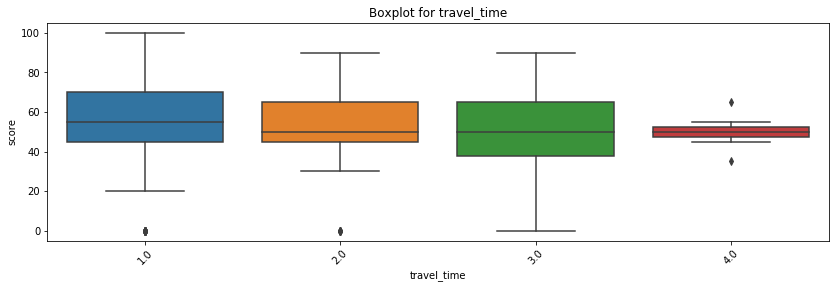

In [87]:
display(pd.DataFrame(students.travel_time).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['travel_time'])
for col in ['travel_time']:
    get_boxplot(col)

### Время на учёбу помимо школы в неделю ('1' - <2 часов, '2' - 2-5 часов, '3' - 5-10 часов, '4' - >10 часов)

In [88]:
students.study_time = students.study_time.apply(
    lambda x: None if pd.isnull(x) else x)
students.study_time.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


2.0    182
1.0     98
3.0     58
4.0     25
Name: study_time, dtype: int64

study_time    0.128166
dtype: float64

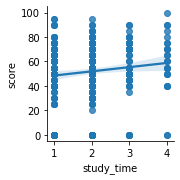

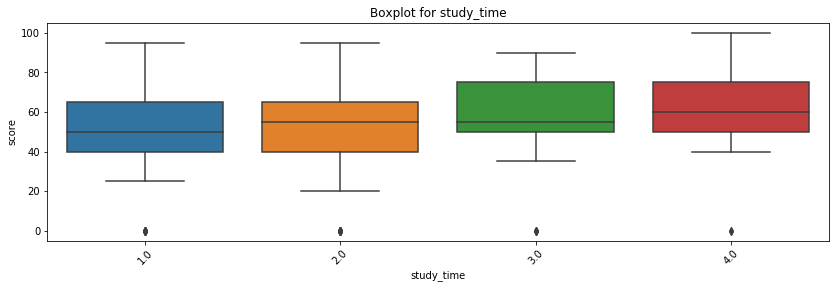

In [89]:
display(pd.DataFrame(students.study_time).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['study_time'])
for col in ['study_time']:
    get_boxplot(col)

### Количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [90]:
students.failures = students.failures.apply(
    lambda x: None if pd.isnull(x) else x)
students.failures.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0.0    277
1.0     45
3.0     15
2.0     14
Name: failures, dtype: int64

failures   -0.339042
dtype: float64

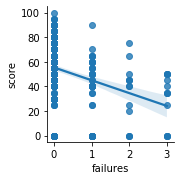

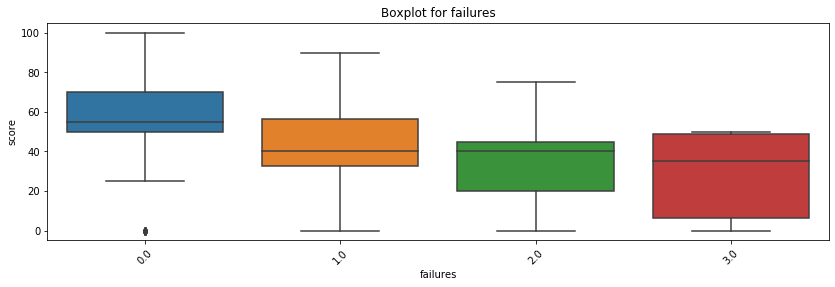

In [91]:
display(pd.DataFrame(students.failures).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['failures'])
for col in ['failures']:
    get_boxplot(col)

### Дополнительная образовательная поддержка ('1' - yes или '0' - no)

In [92]:
students.school_sup = students.school_sup.apply(convert_yes_no)
students.school_sup = students.school_sup.apply(
    lambda x: None if pd.isnull(x) else x)
students.school_sup.value_counts()

0.0    314
1.0     47
Name: school_sup, dtype: int64

school_sup   -0.076201
dtype: float64

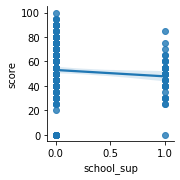

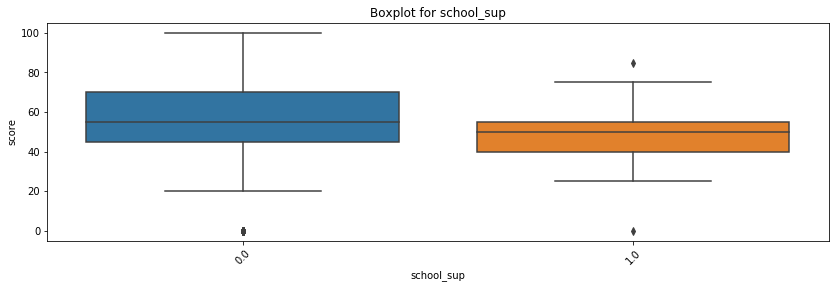

In [93]:
display(pd.DataFrame(students.school_sup).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['school_sup'])
for col in ['school_sup']:
    get_boxplot(col)

### Семейная образовательная поддержка ('1' - yes или '0' - no)

In [94]:
students.fam_sup = students.fam_sup.apply(convert_yes_no)
students.fam_sup = students.fam_sup.apply(
    lambda x: None if pd.isnull(x) else x)
students.fam_sup.value_counts()

1.0    204
0.0    131
Name: fam_sup, dtype: int64

fam_sup   -0.026291
dtype: float64

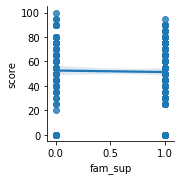

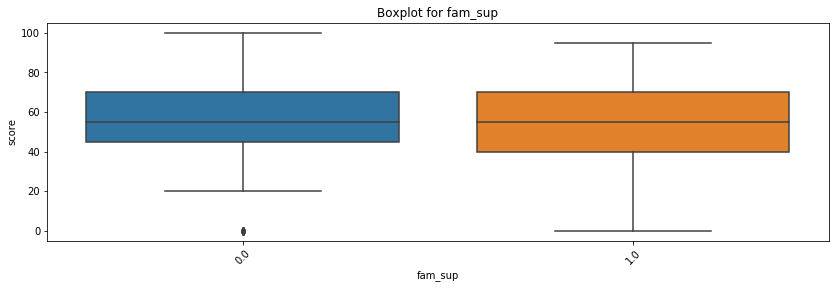

In [95]:
display(pd.DataFrame(students.fam_sup).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['fam_sup'])
for col in ['fam_sup']:
    get_boxplot(col)

### Дополнительные платные занятия по математике ('1' - yes или '0' - no)

In [96]:
students.paid = students.paid.apply(convert_yes_no)
students.paid = students.paid.apply(
    lambda x: None if pd.isnull(x) else x)
students.paid.value_counts()

0.0    188
1.0    145
Name: paid, dtype: int64

paid    0.113083
dtype: float64

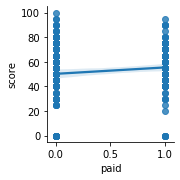

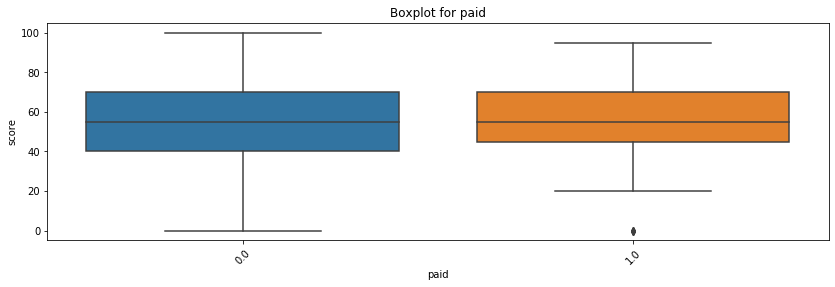

In [103]:
display(pd.DataFrame(students.paid).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['paid'])
for col in ['paid']:
    get_boxplot(col)

### Дополнительные внеучебные занятия ('1' - yes или '0' - no)

In [97]:
students.activities = students.activities.apply(convert_yes_no)
students.activities = students.activities.apply(
    lambda x: None if pd.isnull(x) else x)
students.activities.value_counts()

1.0    180
0.0    176
Name: activities, dtype: int64

activities    0.029781
dtype: float64

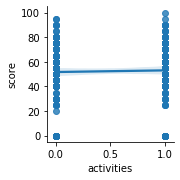

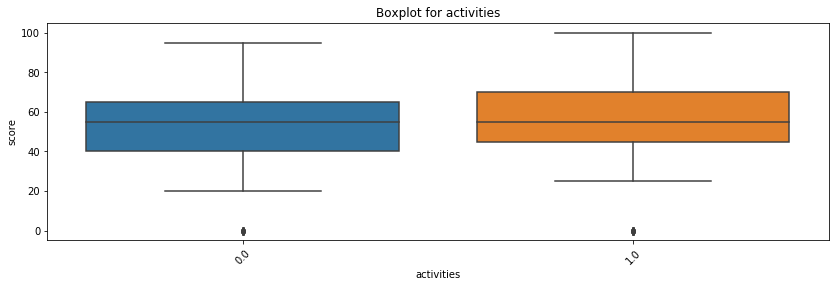

In [106]:
display(pd.DataFrame(students.activities).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['activities'])
for col in ['activities']:
    get_boxplot(col)

### Посещение детского сада ('1' - yes или '0' - no)

In [98]:
students.nursery = students.nursery.apply(convert_yes_no)
students.nursery = students.nursery.apply(
    lambda x: None if pd.isnull(x) else x)
students.nursery.value_counts()

1.0    279
0.0     75
Name: nursery, dtype: int64

nursery    0.028887
dtype: float64

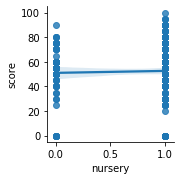

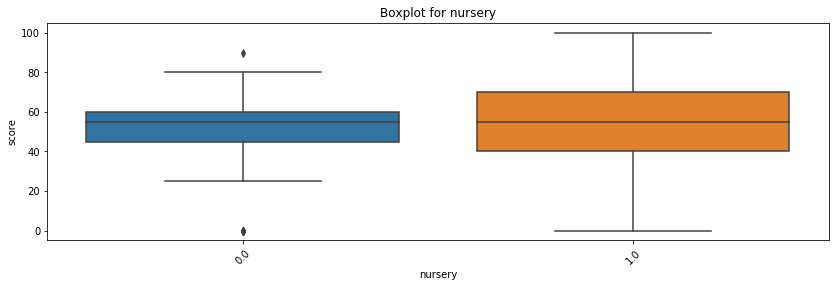

In [108]:
display(pd.DataFrame(students.nursery).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['nursery'])
for col in ['nursery']:
    get_boxplot(col)

### Хочет получить высшее образование ('1' - yes или '0' - no)

In [99]:
students.higher = students.higher.apply(convert_yes_no)
students.higher = students.higher.apply(
    lambda x: None if pd.isnull(x) else x)
students.higher.value_counts()

1.0    333
0.0     19
Name: higher, dtype: int64

higher    0.192143
dtype: float64

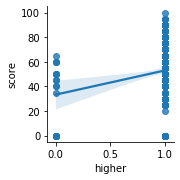

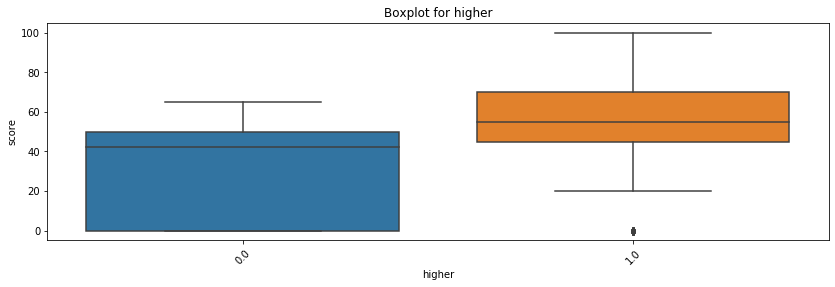

In [110]:
display(pd.DataFrame(students.higher).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['higher'])
for col in ['higher']:
    get_boxplot(col)

### Наличие интернета дома ('1' - yes или '0' - no)

In [100]:
students.internet = students.internet.apply(convert_yes_no)
students.internet = students.internet.apply(
    lambda x: None if pd.isnull(x) else x)
students.internet.value_counts()

1.0    283
0.0     54
Name: internet, dtype: int64

internet    0.060041
dtype: float64

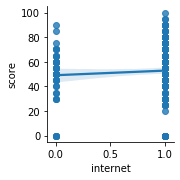

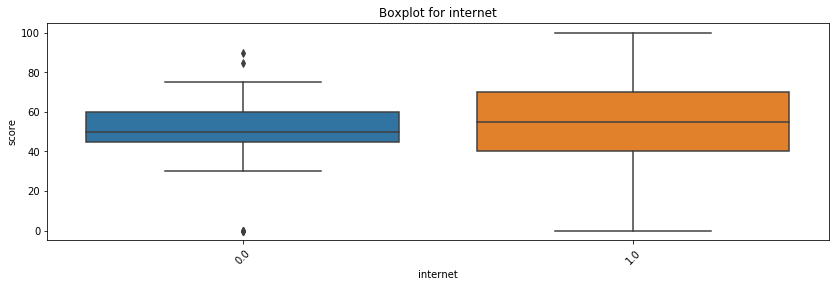

In [112]:
display(pd.DataFrame(students.internet).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['internet'])
for col in ['internet']:
    get_boxplot(col)

### В романтических отношениях ('1' - yes или '0' - no)

In [101]:
students.romantic = students.romantic.apply(convert_yes_no)
students.romantic = students.romantic.apply(
    lambda x: None if pd.isnull(x) else x)
students.romantic.value_counts()

0.0    226
1.0    116
Name: romantic, dtype: int64

romantic   -0.113715
dtype: float64

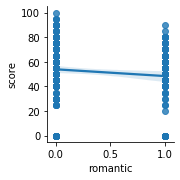

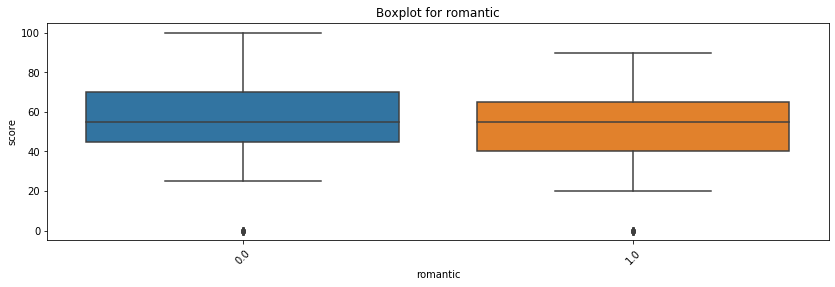

In [114]:
display(pd.DataFrame(students.romantic).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['romantic'])
for col in ['romantic']:
    get_boxplot(col)

### Семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Границы выбросов: [1, 5].


,fam_relation
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7


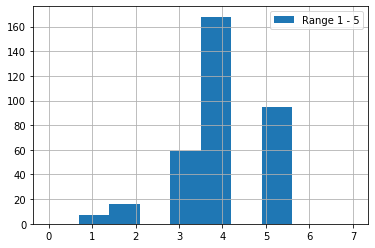

In [102]:
students.fam_relation = students.fam_relation.apply(
    lambda x: None if pd.isnull(x) else x)
print("Границы выбросов: [1, 5].")
students = students.loc[students.fam_relation >= 1]  # нижний предел выброса
students.fam_relation.loc[students.fam_relation.astype(float).between(
    1, 5)].hist(bins=10, range=(0, 7), label='Range 1 - 5')
plt.legend()

pd.DataFrame(students.fam_relation.value_counts())

fam_relation    0.040078
dtype: float64

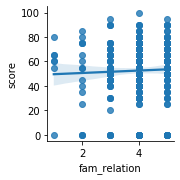

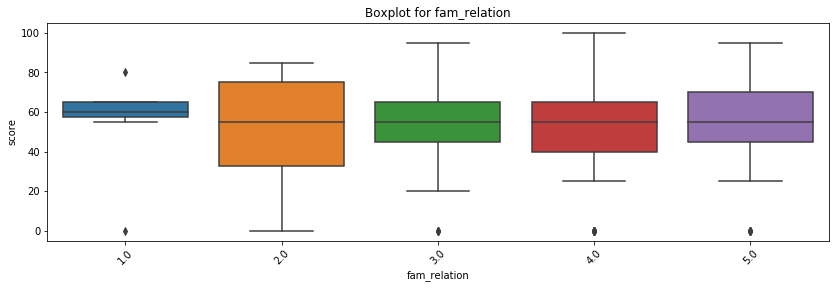

In [103]:
display(pd.DataFrame(students.fam_relation).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['fam_relation'])
for col in ['fam_relation']:
    get_boxplot(col)

### Cвободное время после школы (от 1 - очень мало до 5 - очень мого)

In [104]:
students.free_time = students.free_time.apply(
    lambda x: None if pd.isnull(x) else x)
students.free_time.value_counts()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


3.0    134
4.0     97
2.0     54
5.0     34
1.0     17
Name: free_time, dtype: int64

free_time    0.017866
dtype: float64

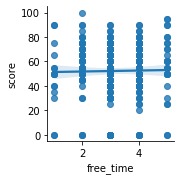

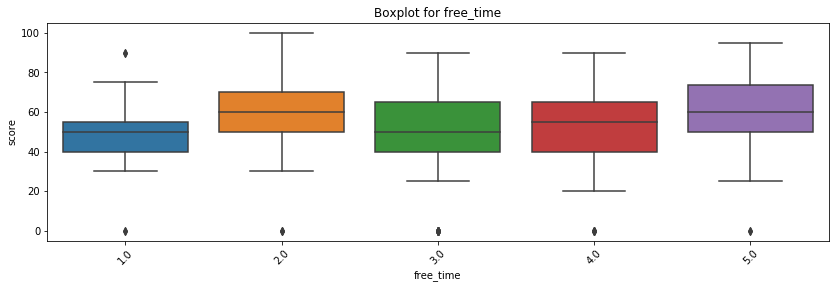

In [118]:
display(pd.DataFrame(students.free_time).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['free_time'])
for col in ['free_time']:
    get_boxplot(col)

### Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


In [105]:
students.go_out = students.go_out.apply(
    lambda x: None if pd.isnull(x) else x)
students.go_out.value_counts()

3.0    115
2.0     87
4.0     71
5.0     45
1.0     19
Name: go_out, dtype: int64

go_out   -0.135084
dtype: float64

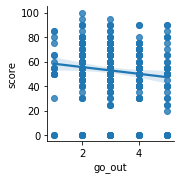

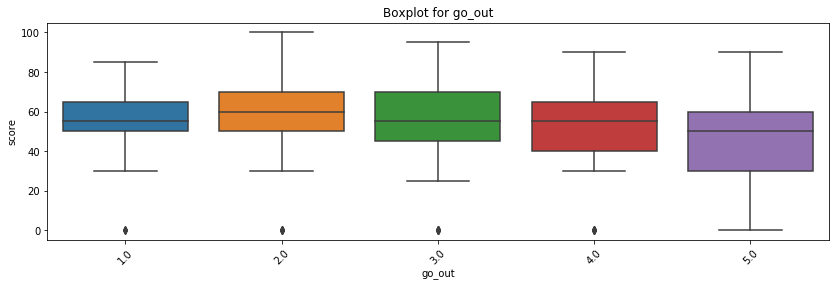

In [120]:
display(pd.DataFrame(students.go_out).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['go_out'])
for col in ['go_out']:
    get_boxplot(col)

### Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [106]:
students.health = students.health.apply(
    lambda x: None if pd.isnull(x) else x)
students.health.value_counts()

5.0    111
3.0     81
4.0     58
1.0     42
2.0     40
Name: health, dtype: int64

health   -0.068347
dtype: float64

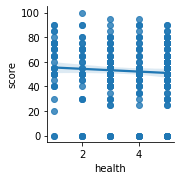

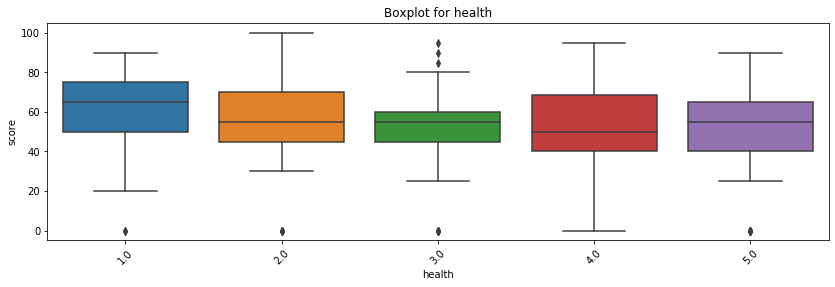

In [122]:
display(pd.DataFrame(students.health).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
get_pairplot(['health'])
for col in ['health']:
    get_boxplot(col)

### Количество пропущенных занятий

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absence, dtype: float64

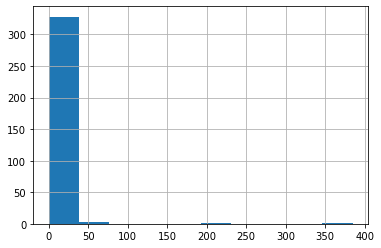

In [107]:
students.absence = students.absence.apply(
    lambda x: None if pd.isnull(x) else x)
students.absence.hist()
students.absence.describe()

###### Рассчитаем межквартильных размах

IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


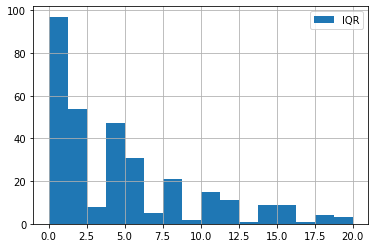

In [108]:
IQR = students.absence.quantile(0.75) - students.absence.quantile(0.25)
perc25 = students.absence.quantile(0.25)
perc75 = students.absence.quantile(0.75)
print(
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absence.loc[students.absence.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 20), label='IQR')

plt.legend()

###### Рассмотрим 18 студентов, которые находятся в выбросах при условии использования IQR

In [109]:
display(students[students.absence >= 20].describe())
students[students.absence >= 20]

,school,sex,age,address,family_size,resid_status,mom_edu,dad_edu,mom_job,dad_job,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,fam_relation,free_time,go_out,health,absence,score
count,18.000000,18.000000,18.000000,18.000000,16.000000,13.000000,18.000000,18.000000,16.000000,17.000000,17.000000,18.000000,18.000000,16.000000,18.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,17.000000,18.000000,18.000000,16.000000,18.000000,18.000000,18.000000,18.000000
mean,1.055556,1.222222,17.500000,1.055556,1.187500,1.153846,3.000000,2.777778,3.875000,3.823529,1.647059,1.444444,1.888889,0.625000,0.166667,0.785714,0.529412,0.277778,0.888889,-5.666667,0.941176,0.941176,0.666667,3.777778,2.937500,3.000000,3.000000,58.777778,55.833333
std,0.235702,0.427793,1.424574,0.235702,0.403113,0.375534,0.840168,0.942809,1.204159,1.424574,0.931476,0.615699,0.582983,0.718795,0.383482,0.425815,0.514496,0.460889,0.323381,1.748949,0.242536,0.242536,0.485071,0.808452,1.236595,1.236694,1.414214,92.787268,19.193289
min,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,20.000000,20.000000
25%,1.000000,1.000000,16.250000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-6.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,2.000000,22.000000,45.000000
50%,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,5.000000,1.000000,1.000000,2.000000,0.500000,0.000000,1.000000,1.000000,0.000000,1.000000,-6.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,24.500000,55.000000
75%,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,5.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.750000,1.000000,-6.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,39.500000,65.000000
max,2.000000,2.000000,20.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,385.000000,90.000000


,school,sex,age,address,family_size,resid_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,fam_relation,free_time,go_out,health,absence,score
40,1,1,16,1.0,2.0,1.0,2.0,2.0,5.0,5.0,home,1.0,2.0,2.0,1.0,0.0,NaN,0.0,1.0,0.0,-6.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,25.0,55.0
74,1,1,16,1.0,1.0,1.0,3.0,3.0,5.0,3.0,home,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,-6.0,1.0,1.0,0.0,4.0,NaN,3.0,5.0,54.0,55.0
103,1,1,15,1.0,1.0,1.0,3.0,2.0,3.0,5.0,home,1.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,-6.0,1.0,1.0,0.0,4.0,3.0,5.0,2.0,26.0,30.0
183,1,1,17,1.0,2.0,NaN,3.0,3.0,5.0,5.0,reputation,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,-6.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0,56.0,40.0
198,1,1,17,1.0,1.0,NaN,4.0,4.0,3.0,1.0,home,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-3.0,1.0,NaN,0.0,4.0,2.0,4.0,2.0,24.0,90.0
205,1,1,17,1.0,1.0,1.0,3.0,4.0,4.0,3.0,home,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,-9.0,1.0,1.0,1.0,4.0,4.0,3.0,5.0,28.0,45.0
216,1,1,17,1.0,1.0,1.0,4.0,3.0,5.0,NaN,reputation,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,-6.0,1.0,1.0,1.0,3.0,4.0,5.0,1.0,22.0,20.0
222,1,1,16,1.0,1.0,1.0,2.0,3.0,3.0,1.0,other,1.0,1.0,2.0,0.0,1.0,NaN,0.0,0.0,1.0,-6.0,1.0,1.0,0.0,2.0,3.0,1.0,3.0,385.0,85.0
237,1,1,16,1.0,NaN,1.0,2.0,1.0,5.0,5.0,home,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,-3.0,1.0,1.0,1.0,4.0,5.0,2.0,5.0,20.0,60.0
260,1,1,18,1.0,1.0,NaN,4.0,3.0,NaN,5.0,home,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,21.0,90.0


######  Для построения корреляции между количеством пропусков и результатами экзамена будем использовать данные в интервале от 0 до 56. Исключим выбросы 385 и 212. 

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


absence_exclud    0.060451
dtype: float64

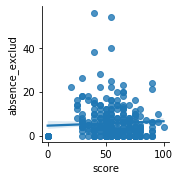

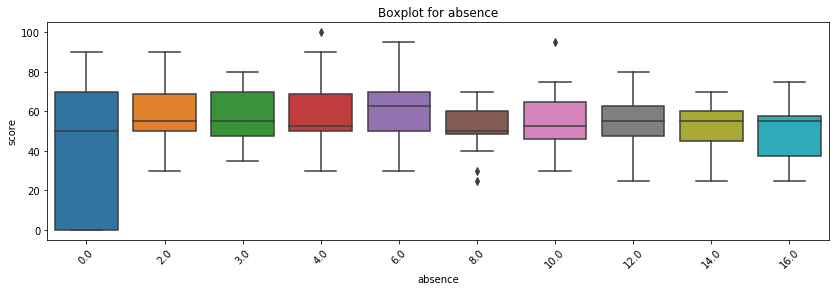

In [110]:
students['absence_exclud'] = students.absence.apply(
    lambda x: None if pd.isnull(x) else None if x == 212.0 else None if x == 385.0 else x)

display(pd.DataFrame(students.absence_exclud).corrwith(
    students.score, axis=0, drop=True, method='pearson'))
sns.pairplot(students, x_vars='score', y_vars='absence_exclud', kind='reg')
for col in ['absence']:
    get_boxplot(col)

### Баллы по госэкзамену по математике

In [111]:
students.score = students.score.apply(
    lambda x: None if pd.isnull(x) else x)
students.score.value_counts()
(students.score > students.score.mean()).sum()
students.score.describe()

/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    339.000000
mean      52.477876
std       22.556214
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

1. Практически в каждом столбце, кроме первых трех, есть пустые значения
2. Выбросы присутствуют в столбце образование отца, семейные отношения 
3. Важные параметры, которые предлагается использовать в дальнейшем для построения модели, это higher, study_time, failures, school, sex, mom_edu, address, school_sup, internet, romantic